In [38]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [39]:
df_labels = pd.read_csv('csvjoinv2/smallworld+v+100+beta+0.5+degree+2.join.node.csv')
df_features = pd.read_csv('../../network_specs/smallworld+v+100+beta+0.specs.csv', sep=';')

#df_features.drop(columns='state', inplace=True)

In [40]:
df_labels['State'] = np.where(
    df_labels['State'] == 'Recovered',
    0,
    1
)

In [41]:
df_labels['State'].value_counts()

0    319946
1        54
Name: State, dtype: int64

In [42]:
df_labels['Id'].value_counts()

p33    3200
p14    3200
p45    3200
p42    3200
p73    3200
       ... 
p49    3200
p80    3200
p41    3200
p8     3200
p37    3200
Name: Id, Length: 100, dtype: int64

In [43]:
df_no_recover_proba = df_labels.groupby('Id')['State'].mean().reset_index(drop=False)
df_no_recover_proba

,Id,State
0,p0,0.000000
1,p1,0.000313
2,p10,0.000625
3,p11,0.000000
4,p12,0.000000
...,...,...
95,p95,0.000000
96,p96,0.000625
97,p97,0.000000
98,p98,0.000313


In [44]:
df_data = df_no_recover_proba.merge(
    df_features,
    on='Id',
    how='left'
)

In [45]:
df_data['binary_state'] = df_data['State'] > 0.0

In [46]:
folder = './jsonDataReport'
roundData = {}

files = os.listdir(folder)
for fname in files:    
        with open(folder+'/'+fname, "r") as f:
            data = json.load(f)  
        node_nneigh = []
        for node_id, node_data in data['0'].items():
            node_data_small = {
                'Id': node_id,
                'nneighWithNodeInfo': node_data['nneighWithNodeInfo']
            }
            node_nneigh.append(node_data_small)
        df_nneigh = pd.DataFrame(node_nneigh)  
        break
        
df_nneigh.head() #nneighWithNodeInfo

,Id,nneighWithNodeInfo
0,p50,16
1,p52,19
2,p51,22
3,p54,17
4,p53,19


In [47]:
folder = './jsonDataReport'
roundData = {}

files = os.listdir(folder)
for fname in files:    
        with open(folder+'/'+fname, "r") as f:
            data = json.load(f)  
        node_nneigh = []
        for node_id, node_data in data['0'].items():
            node_data_small = {
                'Id': node_id,
                'nneighWithNodeInfo': node_data['nneighWithNodeInfo']
            }
            node_nneigh.append(node_data_small)
        df_nneigh = pd.DataFrame(node_nneigh)  
        break
        
df_nneigh.head() #nneighWithNodeInfo

,Id,nneighWithNodeInfo
0,p50,16
1,p52,19
2,p51,22
3,p54,17
4,p53,19


In [48]:
df_data = df_data.merge(df_nneigh, on='Id', how='left')
df_data

,Id,State,closnesscentrality,normclosnesscentrality,eigenvectorcentrality,degree,betweenesscentrality,normbetweenesscentrality,eccentricity,binary_state,nneighWithNodeInfo
0,p0,0.000000,0.272727,27.272727,0.0075,3,88.785725,0.018303,5.0,False,12
1,p1,0.000313,0.236842,23.684211,0.0075,3,44.466459,0.009166,6.0,True,10
2,p10,0.000625,0.236842,23.684211,0.0050,2,16.387013,0.003378,6.0,True,9
3,p11,0.000000,0.289474,28.947368,0.0100,4,108.559792,0.022379,5.0,False,18
4,p12,0.000000,0.291176,29.117647,0.0125,5,165.105528,0.034035,6.0,False,17
...,...,...,...,...,...,...,...,...,...,...,...
95,p95,0.000000,0.286127,28.612717,0.0075,3,57.992039,0.011955,6.0,False,17
96,p96,0.000625,0.274238,27.423823,0.0050,2,26.031599,0.005366,6.0,True,12
97,p97,0.000000,0.307453,30.745342,0.0150,6,357.161102,0.073626,5.0,False,23
98,p98,0.000313,0.294643,29.464286,0.0075,3,82.105206,0.016925,6.0,True,17


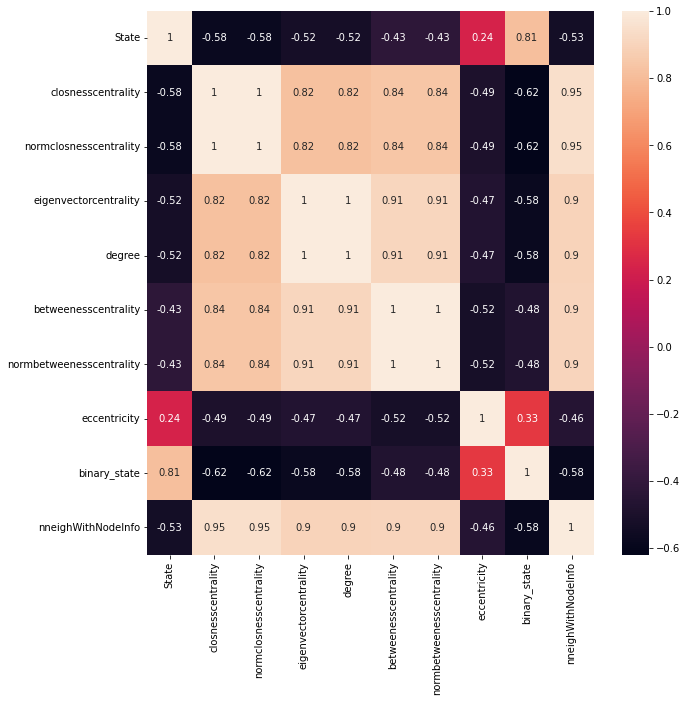

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap((df_data.corr()), annot=True)
plt.show()

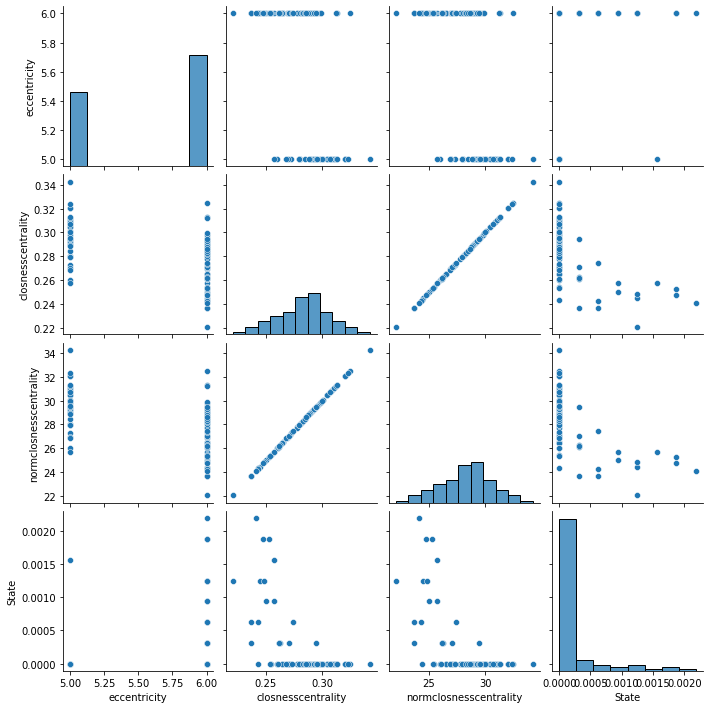

In [50]:
sns.pairplot(
    data=df_data[
        ['eccentricity',
         'closnesscentrality',
         'normclosnesscentrality',
         'State'
        ]
    ]
)

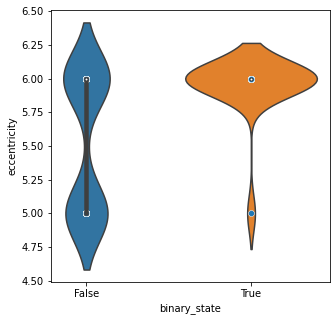

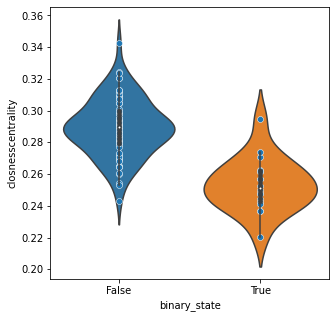

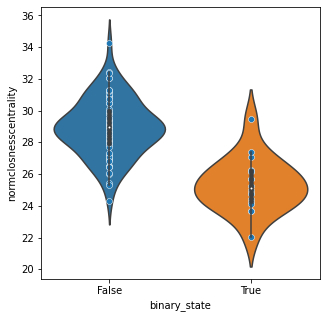

In [51]:
for col in ['eccentricity',
         'closnesscentrality',
         'normclosnesscentrality']:
    plt.figure(figsize=(5,5))
    sns.violinplot(
        data=df_data,
        y=col,
        x='binary_state'
    )
    sns.scatterplot(
        data=df_data,
        y=col,
        x='binary_state'
    )
    plt.show()

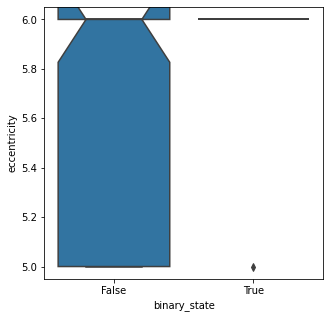

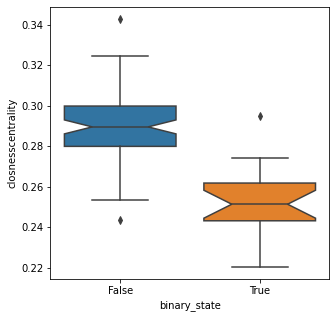

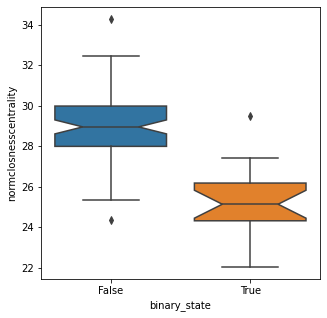

In [52]:
for col in ['eccentricity',
         'closnesscentrality',
         'normclosnesscentrality']:
    plt.figure(figsize=(5,5))
    sns.boxplot(
        data=df_data,
        y=col,
        x='binary_state',
        notch=True
    )
    plt.show()

In [53]:
joined_result_folder = '../joined_boxplot'

if not os.path.exists(joined_result_folder):
    os.mkdir(joined_result_folder)
    
df_data.to_pickle(f'{joined_result_folder}/smallworld.pkl')